# Problem set 3

John Adeleke

Age and maternal health utilization in urban and rural areas of Nigeria.

03/04/2024

## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

A.H1: Increase in age will lead to increase in how frequent a woman utilize maternal healthcare in Nigeria.

  H2: Change in type of place of residence will lead to increase in how frequent a woman utilize maternal healthcare in Nigeria. 

Age measures whether the age range of women of reproductive age in Nigeria (15-49), while maternal health utilization is measure by using the women's number of entries in pregnany and postnatal care roster. This shows the number of time they visited the hospital for any form of maternal care. Urban and rural connote the type of place of residence. These variables are continuous, except for type of place of residence that is nominal.

B. My hypothesized relationships will take two non-linear relationships of splines and nominal models. 
    
C. It appears logically that women who have advanced in age are more likey to utilize maternal health in Nigeria. Past studies have also pointed to the relationships between demographic factors like age shape maternal health utilization in Nigeria. Also, whether someone lives in an urban or rural area will also influence how often they get maternal healthcare due to disparities in healthcare infrastructure.  

D. The dataset is the women recode from the 2018 demographic and health surveys. The sample captures women of reproductive age in Nigeria (15-49)

In [1]:
cd /Users/johnadeleke/Desktop/Stats2/soc211_assignment

/Users/johnadeleke/Desktop/Stats2/soc211_assignment


In [2]:
set more off

(-set more- irrelevant in this version of Stata)


In [3]:
log using "Log for Problem Set 3.log", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/johnadeleke/Desktop/Stats2/soc211_assignment/Log for Proble
> m Set 3.log
  log type:  text
 opened on:   4 Mar 2024, 21:49:48


In [4]:
set maxvar 120000

In [5]:
use /Users/johnadeleke/Desktop/Stats2/soc211_assignment/NGIR7BDT/NGIR7BFL.DTA

In [6]:
describe v106 v013 v025 v481 v417


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
v106            byte    %8.0g      V106       highest educational level
v013            byte    %8.0g      V013       age in 5-year groups
v025            byte    %8.0g      V025       type of place of residence
v481            byte    %8.0g      V481       covered by health insurance
v417            byte    %8.0g                 entries in pregnancy and
                                                postnatal care roster


In [7]:
codebook v106 v013 v025 v481 v417


-------------------------------------------------------------------------------
v106                                                  highest educational level
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: V106

                 Range: [0,3]                         Units: 1
         Unique values: 4                         Missing .: 0/41,821

            Tabulation: Freq.   Numeric  Label
                       14,398         0  no education
                        6,383         1  primary
                       16,698         2  secondary
                        4,342         3  higher

-------------------------------------------------------------------------------
v013                                                       age in 5-year groups
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: V

## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

In [8]:
sum v417 v013


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        v417 |     41,821    .8111714    .9063227          0          6
        v013 |     41,821    3.498649    1.934652          1          7


In [9]:
xtile agequant = v013, nq(5)

In [10]:
sum v013, detail
tab agequant


                    age in 5-year groups
-------------------------------------------------------------
      Percentiles      Smallest
 1%            1              1
 5%            1              1
10%            1              1       Obs              41,821
25%            2              1       Sum of wgt.      41,821

50%            3                      Mean           3.498649
                        Largest       Std. dev.      1.934652
75%            5              7
90%            6              7       Variance       3.742878
95%            7              7       Skewness       .3112002
99%            7              7       Kurtosis       1.936921

5 quantiles |
    of v013 |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      8,423       20.14       20.14
          2 |     14,047       33.59       53.73
          3 |      5,997       14.34       68.07
          4 |      5,406       12.93       81.00
          5 |      7,948

In [11]:
%head v417 v013 agequant

,v417,v013,agequant
1,1,40-44,5
2,0,15-19,1
3,1,35-39,4
4,1,25-29,2
5,0,25-29,2


In [12]:
sum v013 if agequant==3


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        v013 |      5,997           4           0          4          4


(bin=46, start=1, width=.06521739)
(bin=46, start=0, width=.06521739)


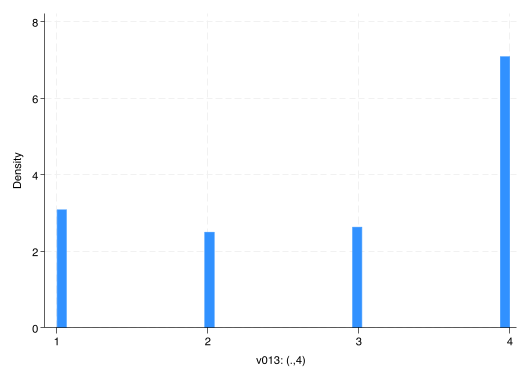

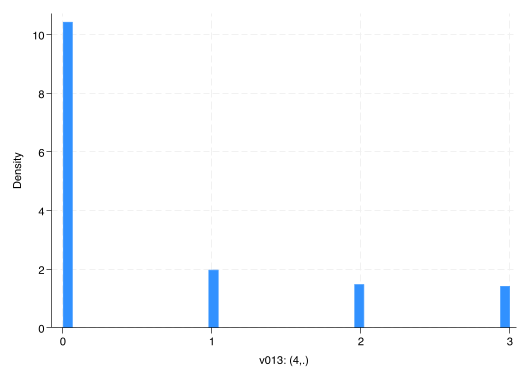

In [13]:
mkspline age1 4 age2 = v013

histogram age1, name(hist1)
histogram age2, name(hist2)

In [14]:
reg v417 age1 age2
predict yhat



      Source |       SS           df       MS      Number of obs   =    41,821
-------------+----------------------------------   F(2, 41818)     =   5546.75
       Model |  7202.24705         2  3601.12352   Prob > F        =    0.0000
    Residual |  27149.5737    41,818  .649231758   R-squared       =    0.2097
-------------+----------------------------------   Adj R-squared   =    0.2096
       Total |  34351.8207    41,820  .821420868   Root MSE        =    .80575

------------------------------------------------------------------------------
        v417 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        age1 |   .3786051   .0039893    94.90   0.000     .3707859    .3864242
        age2 |  -.4345484   .0047756   -90.99   0.000    -.4439086   -.4251882
       _cons |  -.0235906   .0109575    -2.15   0.031    -.0450674   -.0021137
--------------------------------------------------

In [15]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


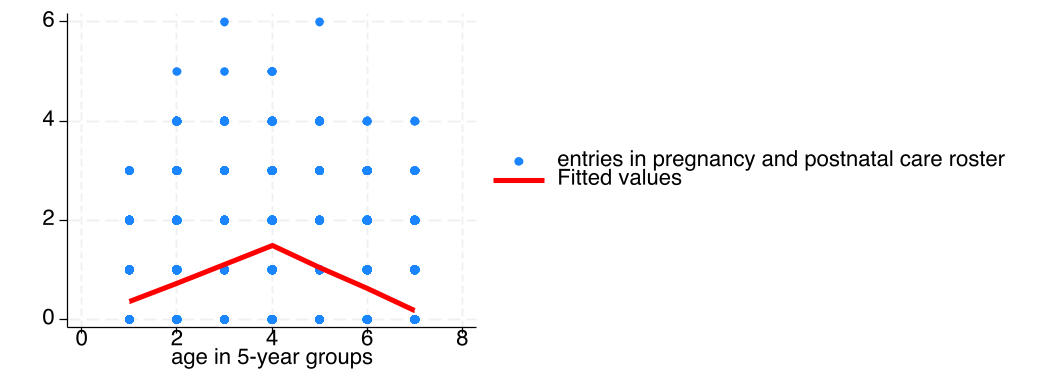

In [16]:
*Spline model 

tw (scatter v417 v013) (line yhat v013, sort color(red) lwidth(thick))

In [17]:
mkspline age3 = v013, cubic displayknots


             |     knot1      knot2      knot3      knot4      knot5 
-------------+-------------------------------------------------------
        v013 |         1          2          3          5          7 


In [18]:
regress v417 age3*


      Source |       SS           df       MS      Number of obs   =    41,821
-------------+----------------------------------   F(4, 41816)     =   3414.90
       Model |  8458.34554         4  2114.58639   Prob > F        =    0.0000
    Residual |  25893.4752    41,816  .619224105   R-squared       =    0.2462
-------------+----------------------------------   Adj R-squared   =    0.2462
       Total |  34351.8207    41,820  .821420868   Root MSE        =    .78691

------------------------------------------------------------------------------
        v417 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age31 |   .8889146    .017891    49.69   0.000      .853848    .9239813
       age32 |  -3.371675   .2146471   -15.71   0.000    -3.792387   -2.950962
       age33 |   4.337383   .5561108     7.80   0.000     3.247395    5.427372
       age34 |    .033703    .444407     0.08   0.

In [19]:
predict yhat2

(option xb assumed; fitted values)


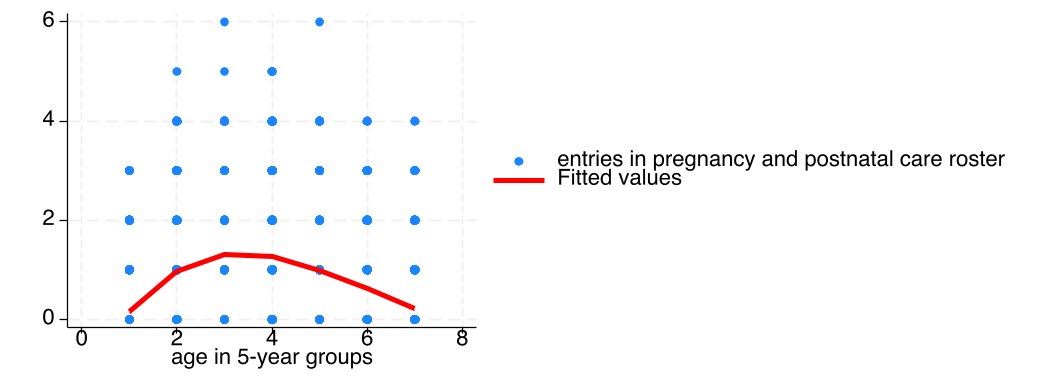

In [20]:
tw (scatter v417 v013) (line yhat2 v013, sort color(red) lwidth(thick))

In [21]:
*Nominal model
xi i.v025 i.v481, noomit

In [22]:
%head v025 v481 _I* if _n<6

,v025,v481,_Iv025_1,_Iv025_2,_Iv481_0,_Iv481_1
1,urban,no,1,0,1,0
2,urban,no,1,0,1,0
3,urban,no,1,0,1,0
4,urban,no,1,0,1,0
5,urban,no,1,0,1,0


In [23]:
xi: reg v417 ib2.v025 ib3.v481

note: 1.v481 omitted because of collinearity.
note: 3b.v481 identifies no observations in the sample.

      Source |       SS           df       MS      Number of obs   =    41,821
-------------+----------------------------------   F(2, 41818)     =    270.47
       Model |  438.686143         2  219.343071   Prob > F        =    0.0000
    Residual |  33913.1346    41,818  .810969787   R-squared       =    0.0128
-------------+----------------------------------   Adj R-squared   =    0.0127
       Total |  34351.8207    41,820  .821420868   Root MSE        =    .90054

------------------------------------------------------------------------------
        v417 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        v025 |
      urban  |  -.2029461   .0090065   -22.53   0.000    -.2205991   -.1852931
             |
        v481 |
         no  |   .0992365   .0274336     3.62   0.000      .0


Variables that uniquely identify margins: v025


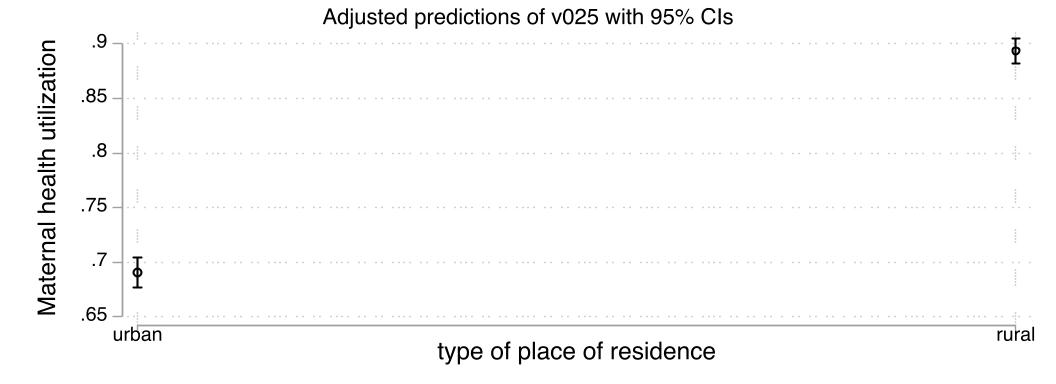

In [24]:
set scheme plotplainblind
qui margins i.v025, atmeans
*marginsplot
marginsplot, unique recast(scatter) ytitle(Maternal health utilization)

In [25]:
*Model 1
quietly eststo: reg v417 v013

*Model 2
quietly eststo: reg v417 v025

In [26]:
esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (v013 "Age" v025 "Residence") noconstant


--------------------------------------------
                      (1)             (2)   
                  Model 1         Model 2   
                     b/se            b/se   
--------------------------------------------
Age                 0.019***                
                  (0.002)                   
Residence                           0.206***
                                  (0.009)   
--------------------------------------------
R-Squared           0.002           0.012   
N               41821.000       41821.000   
--------------------------------------------


## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    
    A. Older women are more likely to utilize maternal health care in Nigeria. From the output above, Age is statistically significant for maternal health utilization in model  (p < 0.001). This supports my earlier hypothesis that increase in age will lead to increase in how frequent a woman utilize maternal healthcare in Nigeria. For model 2, we can see that change in type of place of residence will lead to increase in how frequent a woman utilize maternal healthcare. Residence is statistically significant for maternal health utilization in Nigeria.
    
    B. Say whether a linear or particular non-linear model best describes your data and why
    
    B.  For the spline relationship in model 1, it best describe my data as it exhibits a curved pattern and not follow a straight line which can be explained to mean that an increase in age will lead to increase in maternal health utilization as seen from age 22, but dropped at age 42. This can also be interpreted using the r-squared. The r-squared of 0.2462 shows that 25% of the variation in maternal health utilization can be explained by age. This makes sense theoretically as women advance in age, they give birth until they grow older and stop giving birth, hence, less frequent visits for antenatal or postnatal care. In model 2 with an r-squared of 0.0128 which means that 1.28% of variation in maternal health utilization can be explained by type of place of residence. This shows that type of place of residence has limited or little explanatory power in for predicting maternal health utilization in Nigeria. Therefore, this model provides a poor fit for the data. 

In [27]:
log close

      name:  <unnamed>
       log:  /Users/johnadeleke/Desktop/Stats2/soc211_assignment/Log for Proble
> m Set 3.log
  log type:  text
 closed on:   4 Mar 2024, 21:50:04
-------------------------------------------------------------------------------
